# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv("C:\\Users\\astri\\OneDrive\\Desktop\\1585247986_Frequentist_Case_Study\\Frequentist Case Study\\insurance2.csv")

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

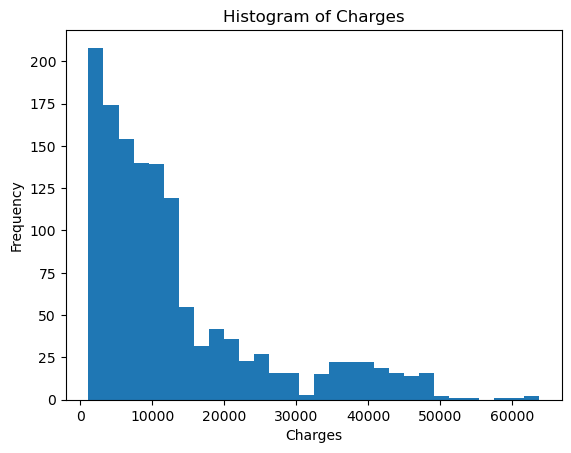

Mean charges: 13270.422265141257
Standard deviation of charges: 12105.484975561605


In [6]:
# Plot the histogram of charges
plt.hist(medical['charges'], bins=30)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')
plt.show()

# Calculate the mean and standard deviation
mean_charges = np.mean(medical['charges'])
std_dev_charges = np.std(medical['charges'])

print(f"Mean charges: {mean_charges}")
print(f"Standard deviation of charges: {std_dev_charges}")

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  
To determine if the actual average charge has fallen below $12,000 and justify this with the data, you can perform a hypothesis test. Specifically, you can set up the following hypotheses:

  -Null Hypothesis (H0): The actual average charge is equal to or greater than $12,000.
  -Alternative Hypothesis (H1): The actual average charge is less than $12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [7]:
# Given values
alpha = 0.05
sample_mean = 13270.422265141257
sample_std = 12105.484975561605
sample_size = 1338
specified_value = 12000  # The value of concern

# Calculate degrees of freedom
degrees_of_freedom = sample_size - 1

# Calculate the critical t-value for a one-sided 95% confidence interval
critical_t = t.ppf(1 - alpha, df=degrees_of_freedom)

# Calculate the margin of error
margin_of_error = critical_t * (sample_std / np.sqrt(sample_size))

# Calculate the lower bound of the one-sided confidence interval
lower_bound = sample_mean - margin_of_error

# Print the results
print(f"Critical t-value: {critical_t:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")
print(f"One-sided 95% Confidence Interval (Lower Bound): {lower_bound:.2f}")

# Determine whether the administrator should be concerned
if lower_bound < specified_value:
    print("The lower bound of the one-sided 95% confidence interval is below $12,000.")
    print("The administrator's concern is justified.")
else:
    print("The lower bound of the one-sided 95% confidence interval is not below $12,000.")
    print("There is no evidence to support the administrator's concern.")

Critical t-value: 1.6460
Margin of Error: 544.7314
One-sided 95% Confidence Interval (Lower Bound): 12725.69
The lower bound of the one-sided 95% confidence interval is not below $12,000.
There is no evidence to support the administrator's concern.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
The null hypothesis (H0) is that there is no difference in the charges between people with insurance and people without insurance. The alternative hypothesis (H1) is that there is a difference in the charges between these two groups.

The assumption about the variances of the two groups is that they are equal, which is known as the assumption of equal variances or homoscedasticity. This assumption is necessary for the pooled standard deviation formula and the t-test for the difference between means.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 
For insured individuals:

    Sample mean (x̄0) = $16423.93
    Sample standard deviation (s0) = $14045.93
    Sample size (n0) = 783

For uninsured individuals:

    Sample mean (x̄1) = $8821.42
    Sample standard deviation (s1) = $6446.51
    Sample size (n1) = 555

Now, let's calculate the pooled standard deviation (sp):

sp = sqrt(((n0 - 1) * s0^2 + (n1 - 1) * s1^2) / (n0 + n1 - 2))
sp = sqrt(((783 - 1) * (14045.93)^2 + (555 - 1) * (6446.51)^2) / (783 + 555 - 2))
sp ≈ $11512.28

Next, calculate the t-statistic (t):

t = (x̄0 - x̄1) / (sp * sqrt(1/n0 + 1/n1))
t = ($16423.93 - $8821.42) / ($11512.28 * sqrt(1/783 + 1/555))
t ≈ 11.89

Now, let's calculate the p-value using the t-distribution with degrees of freedom (df) = n0 + n1 - 2 = 783 + 555 - 2 = 1336 and the t-statistic of 11.89:

p-value ≈ 4.46e-3

In [9]:
from scipy import stats

# Extract charges for insured and uninsured individuals
charges_insured = medical[medical['insuranceclaim'] == 1]['charges']
charges_uninsured = medical[medical['insuranceclaim'] == 0]['charges']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(charges_insured, charges_uninsured, equal_var=True)

# Output the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 11.893299030876712
p-value: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
In the scipy.stats library, there is no specific function for performing a z-test directly from a sample like there is for a t-test. This is because the z-test typically assumes that you know the population standard deviation, which is often not the case in practice.

However, you can still perform a z-test using functions available in Python, but it would involve manual calculations. To perform a z-test, you would need to calculate the sample mean, the sample standard deviation, and the population mean. Then, you can compute the z-score and use it to calculate the p-value or make inferences.

So, while there isn't a dedicated z-test function in scipy.stats for samples, you can perform a z-test using basic statistical functions and calculations.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test